# Data Understanding

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from collections import Counter
from wordcloud import WordCloud

# Natural Language Toolkit for text processing
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Modeling libraries
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC, SVC
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay, f1_score, precision_score, recall_score
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import Pipeline
from iterstrat.ml_stratifiers import MultilabelStratifiedShuffleSplit
from sklearn.model_selection import train_test_split as MultilabelStratifiedShuffleSplit_fallback 
from sklearn.multioutput import MultiOutputClassifier


# Text feature extraction
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS



# Set a clean Seaborn style for all plots
sns.set_theme(style="whitegrid")

# Setting max columns to display all columns in DataFrame outputs
pd.set_option('display.max_columns', 300)

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")


In [4]:
# Downloading the NLTK necessary resources
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/muchiri/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/muchiri/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/muchiri/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
raw = pd.read_csv('data/df_raw.csv')


In [6]:
raw.head()

,text,id,author,subreddit,link_id,parent_id,created_utc,rater_id,example_very_unclear,admiration,amusement,anger,annoyance,approval,caring,confusion,curiosity,desire,disappointment,disapproval,disgust,embarrassment,excitement,fear,gratitude,grief,joy,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,That game hurt.,eew5j0j,Brdd9,nrl,t3_ajis4z,t1_eew18eq,1.548381e+09,1,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,>sexuality shouldn’t be a grouping category I...,eemcysk,TheGreen888,unpopularopinion,t3_ai4q37,t3_ai4q37,1.548084e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"You do right, if you don't care then fuck 'em!",ed2mah1,Labalool,confessions,t3_abru74,t1_ed2m7g7,1.546428e+09,37,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,Man I love reddit.,eeibobj,MrsRobertshaw,facepalm,t3_ahulml,t3_ahulml,1.547965e+09,18,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
4,"[NAME] was nowhere near them, he was by the Fa...",eda6yn6,American_Fascist713,starwarsspeculation,t3_ackt2f,t1_eda65q2,1.546668e+09,2,False,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211225 entries, 0 to 211224
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   text                  211225 non-null  object 
 1   id                    211225 non-null  object 
 2   author                211225 non-null  object 
 3   subreddit             211225 non-null  object 
 4   link_id               211225 non-null  object 
 5   parent_id             211225 non-null  object 
 6   created_utc           211225 non-null  float64
 7   rater_id              211225 non-null  int64  
 8   example_very_unclear  211225 non-null  bool   
 9   admiration            211225 non-null  int64  
 10  amusement             211225 non-null  int64  
 11  anger                 211225 non-null  int64  
 12  annoyance             211225 non-null  int64  
 13  approval              211225 non-null  int64  
 14  caring                211225 non-null  int64  
 15  

In [8]:
raw.columns

Index(['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id',
       'created_utc', 'rater_id', 'example_very_unclear', 'admiration',
       'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion',
       'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust',
       'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy',
       'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief',
       'remorse', 'sadness', 'surprise', 'neutral'],
      dtype='object')

In [9]:
# Calculate the number of missing values per column
missing_values_count = raw.isnull().sum()

# Sort the missing values in descending order
missing_values_sorted = missing_values_count.sort_values(ascending=False)

# Print the result
print("Missing values per column (highest to lowest):")
print(missing_values_sorted)

Missing values per column (highest to lowest):
text                    0
disapproval             0
embarrassment           0
excitement              0
fear                    0
gratitude               0
grief                   0
joy                     0
love                    0
nervousness             0
optimism                0
pride                   0
realization             0
relief                  0
remorse                 0
sadness                 0
surprise                0
disgust                 0
disappointment          0
id                      0
desire                  0
author                  0
subreddit               0
link_id                 0
parent_id               0
created_utc             0
rater_id                0
example_very_unclear    0
admiration              0
amusement               0
anger                   0
annoyance               0
approval                0
caring                  0
confusion               0
curiosity               0
neutral          

- No column has null values. 

In [10]:
raw.duplicated().sum()

0

- no duplicates

In [11]:
# Listing the emotion columns.
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]


In [12]:
# Function to analyze emotion columns in a single row and determine the final emotion(s)
def determine_emotion(row):
    emotion_values = row[emotion_columns]

    active_emotions= emotion_values[emotion_values == 1]

    if len(active_emotions) > 0:
        return ', '.join(active_emotions.index.tolist())
    else:
        return 'no_emotion'
    


In [13]:
# Creating the 'final_emotion' column that shows the emotion of the text
raw['final_emotion'] = raw.apply(determine_emotion, axis = 1)

In [14]:
raw[['final_emotion', 'text']].head()

,final_emotion,text
0,sadness,That game hurt.
1,no_emotion,>sexuality shouldn’t be a grouping category I...
2,neutral,"You do right, if you don't care then fuck 'em!"
3,love,Man I love reddit.
4,neutral,"[NAME] was nowhere near them, he was by the Fa..."


In [15]:
# Creating the 'count_emotions' column that shows he number of emotions detected per text
raw['count_emotions']= raw[emotion_columns].sum(axis=1).astype(int)

In [16]:
three_plus = raw[raw['count_emotions']>3]

In [17]:
three_plus_total = len(three_plus)
print(three_plus_total)

589


- <=4 were 211035

- <=3 were 210636

- greater than >3 were 589

## EDA

### Emotion Frequency Distribution

This step will see which emotions are the most common

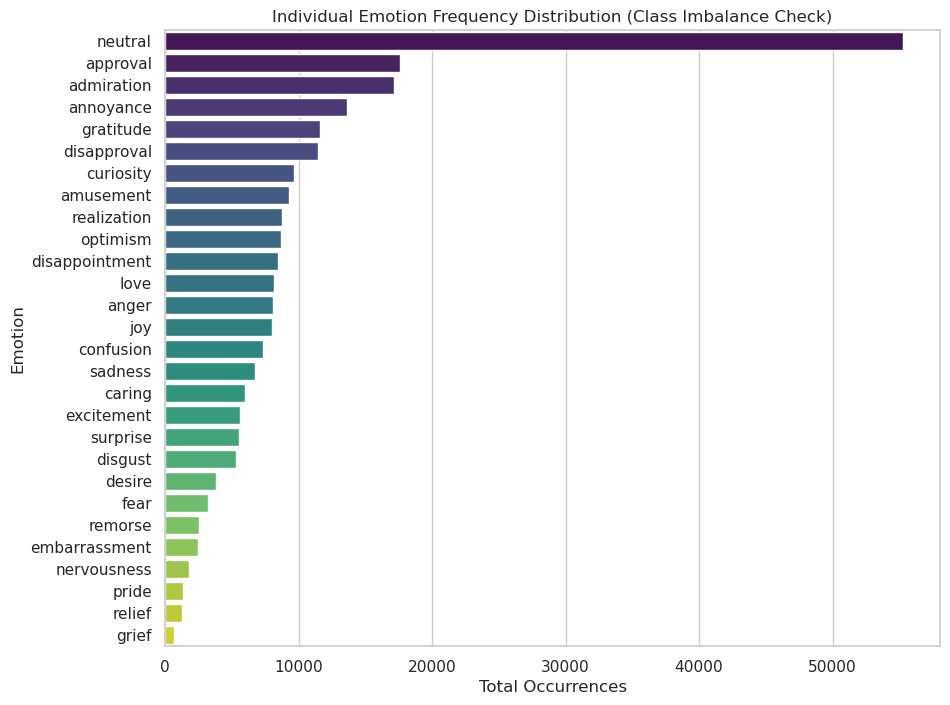

In [18]:
emotion_counts = raw[emotion_columns].sum().sort_values(ascending=False)
    
plt.figure(figsize=(10, 8))
sns.barplot(x=emotion_counts.values, y=emotion_counts.index, palette="viridis")
plt.title('Individual Emotion Frequency Distribution (Class Imbalance Check)')
plt.xlabel('Total Occurrences')
plt.ylabel('Emotion')
plt.show()
plt.close()

The chart displays the frequency distribution of texts across different emotion categories, highlighting how imbalanced the dataset is.

Neutral emotions overwhelmingly dominate the dataset, meaning most texts do not express strong affective content.

Emotions such as approval, admiration, annoyance, gratitude, and disapproval appear moderately often, indicating that they are more commonly expressed than others but still far less frequent than neutral.

Emotions like grief, relief, pride, nervousness, and embarrassment are the least represented, suggesting underrepresentation of strong or rare emotional states.

This imbalance implies that models trained on this data may be biased toward predicting neutral or frequently occurring emotions, so class balancing or weighting may be necessary to improve fairness and performance.

### Multi-Label Complexity Analysis

This will show much of our data is single-label vs. multi-label.

Summary of Emotion Counts:
count    211225.000000
mean          1.181342
std           0.498757
min           0.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          12.000000
Name: count_emotions, dtype: float64


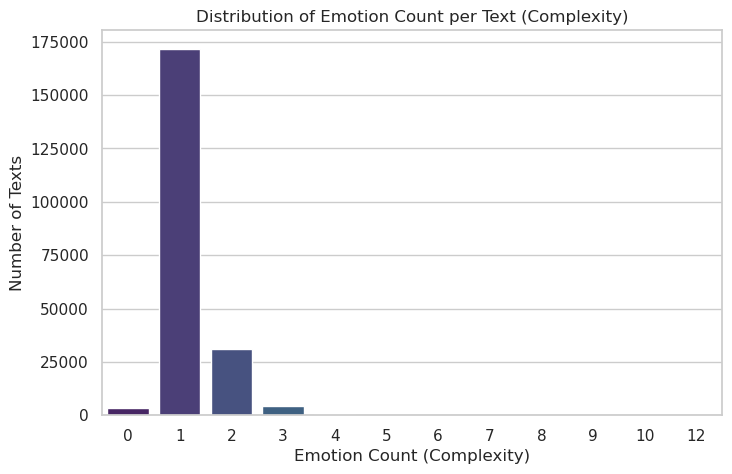

In [19]:
plt.figure(figsize=(8, 5))
sns.countplot(x=raw['count_emotions'], palette="viridis")
plt.title('Distribution of Emotion Count per Text (Complexity)')
plt.xlabel('Emotion Count (Complexity)')
plt.ylabel('Number of Texts')
print(f"Summary of Emotion Counts:\n{raw['count_emotions'].describe()}")
plt.show()
plt.close()

The chart shows the distribution of emotion count per text, representing how many different emotions are detected in each text entry.

The vast majority of texts have only one emotion, indicating that most expressions in the dataset convey a single dominant emotional state.

A smaller portion of texts contain two or more emotions, showing that some sentences express mixed feelings or emotional complexity.

The mean emotion count of around 1.18 suggests that, on average, each text is associated with roughly one emotion.

Very few texts have three or more emotions, and extreme cases (up to 12 emotions) are rare outliers, highlighting that multi-emotional texts are uncommon in this dataset.

### Emotion Co-occurrence Matrix

This will show correlation between different emotional relationships

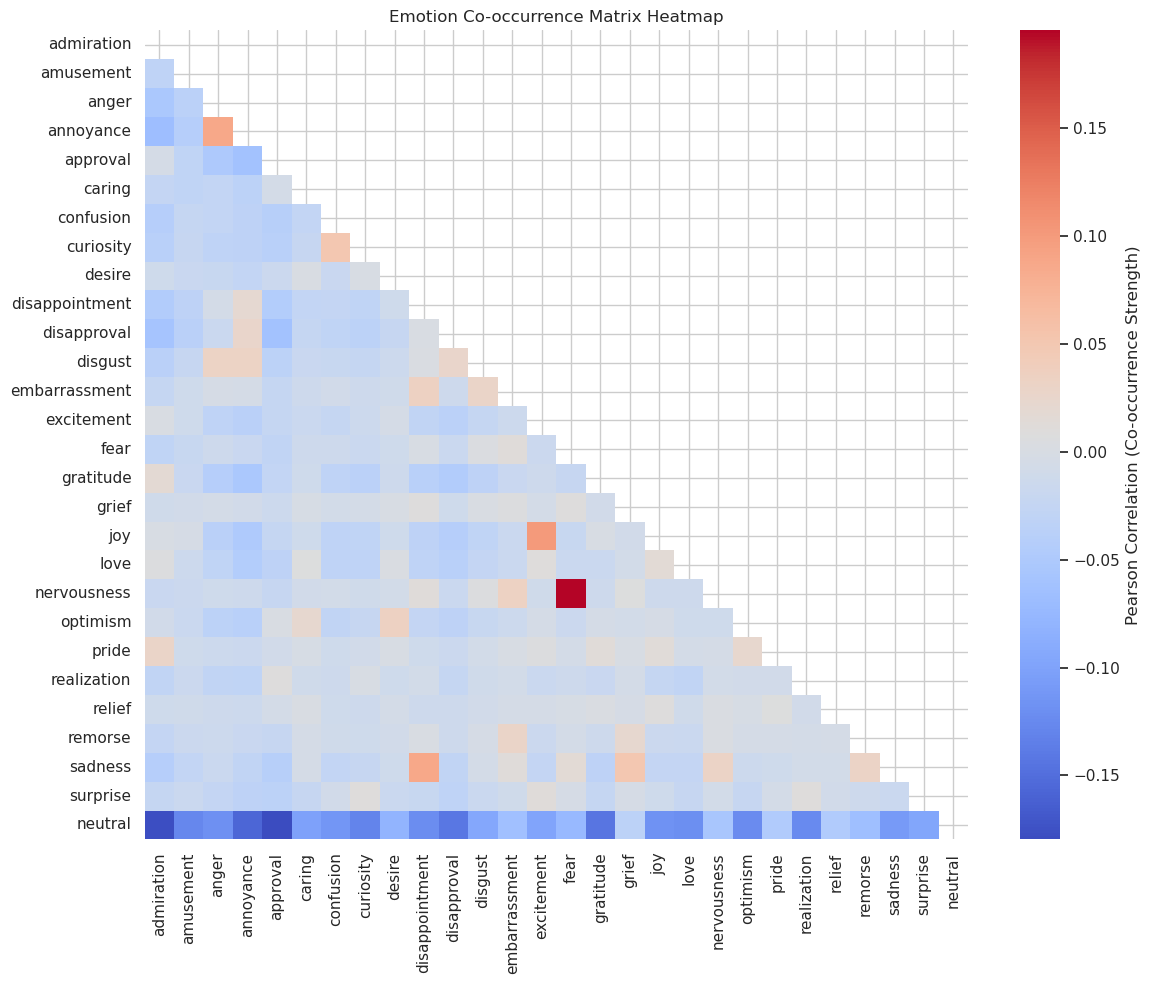

In [20]:
# Calculate the correlation matrix (a measure of how often they co-occur)
correlation_matrix = raw[emotion_columns].corr()
    
plt.figure(figsize=(12, 10))
# Use a triangular mask to only show unique correlations (above the diagonal)
mask = np.triu(correlation_matrix)
    
sns.heatmap(
        correlation_matrix, 
        annot=False, # Set to True to see correlation values
        cmap='coolwarm', 
        fmt=".2f",
        mask=mask,
        cbar_kws={'label': 'Pearson Correlation (Co-occurrence Strength)'}
    )
plt.title('Emotion Co-occurrence Matrix Heatmap')
plt.tight_layout()
plt.show()
plt.close()

**Key Observations**

Most correlations are weak, with a few clear positive and negative pockets.

Neutral” has broadly negative correlation with nearly every other emotion (deep blue along the bottom row).

A clear warm cluster appears among positive-valence emotions.

**Strong Positive**

Joy ↔ Love (strongest bright red square).

Joy ↔ Optimism; Joy ↔ Gratitude; Joy ↔ Amusement (noticeable warm tones around joy).

Guilt ↔ Remorse; Embarrassment ↔ Shame (moderate warm spots typical of related emotions).

Disgust ↔ Disapproval; Anger ↔ Annoyance; Fear ↔ Nervousness (milder but consistent positives).



### Subreddit Bias Analysis

Determining if different sources (subreddits) have different emotional profiles.

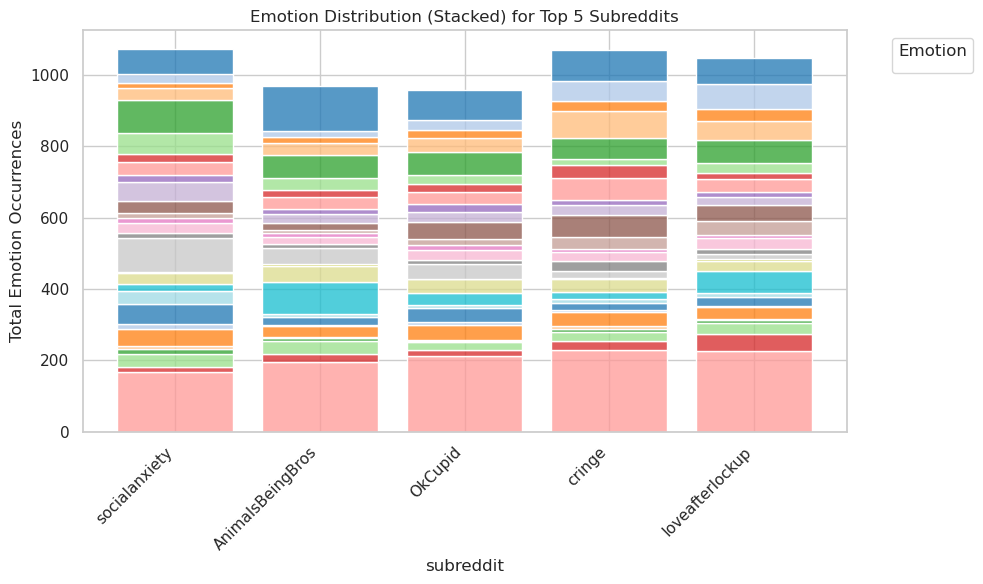

In [21]:
# Get the top 5 subreddits
top_subreddits = raw['subreddit'].value_counts().nlargest(5).index.tolist()
        
# Melt the DataFrame to long format for easier plotting
df_melt = raw[raw['subreddit'].isin(top_subreddits)][['subreddit'] + emotion_columns]
df_melt = df_melt.melt(id_vars='subreddit', value_vars=emotion_columns, 
                               var_name='Emotion', value_name='Count')
        
# Filter for rows where the emotion is present (Count=1)
df_plot = df_melt[df_melt['Count'] == 1]

plt.figure(figsize=(10, 6))
sns.histplot(
            data=df_plot, 
            x='subreddit', 
            hue='Emotion', 
            multiple='stack', 
            shrink=0.8,
            palette='tab20' 
        )
plt.title('Emotion Distribution (Stacked) for Top 5 Subreddits')
plt.ylabel('Total Emotion Occurrences')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Emotion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
plt.close()

### Length Correlation

Checking for relationship between text length and emotional complexity


--- 5. Text Length vs. Emotion Count (Correlation and Scatter Plot) ---
Pearson Correlation (Text Length vs. Emotion Count): 0.1263
Interpretation: There is a weak positive correlation, suggesting slightly longer texts may contain more mixed emotions.


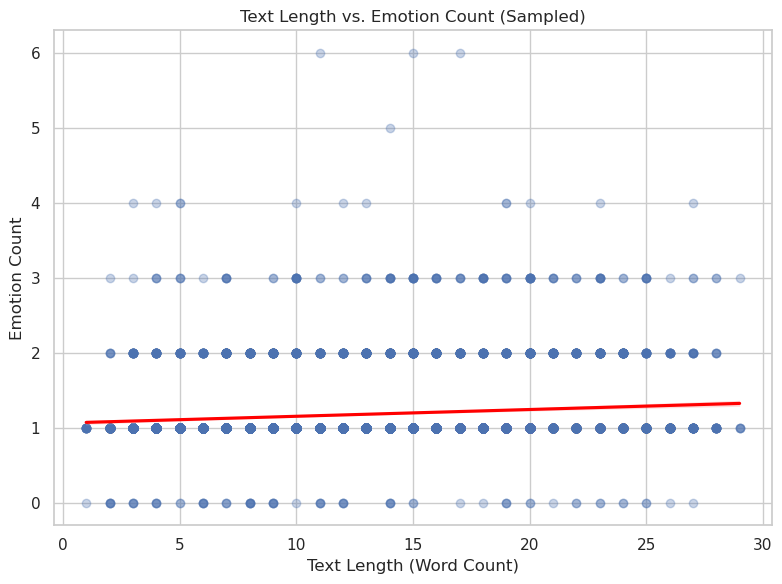

In [22]:
raw['text_length'] = raw['text'].apply(lambda x: len(str(x).split()))
    
print("\n--- 5. Text Length vs. Emotion Count (Correlation and Scatter Plot) ---")
correlation = raw['text_length'].corr(raw['count_emotions'])
print(f"Pearson Correlation (Text Length vs. Emotion Count): {correlation:.4f}")
    
if correlation > 0.1:
    print("Interpretation: There is a weak positive correlation, suggesting slightly longer texts may contain more mixed emotions.")
elif correlation < -0.1:
    print("Interpretation: There is a weak negative correlation, suggesting shorter texts may contain more mixed emotions.")
else:
    print("Interpretation: Little to no linear correlation found.")
        
# Scatter plot with regression line (using a sample for large datasets)
sample_df = raw.sample(min(5000, len(raw)), random_state=42)
    
plt.figure(figsize=(8, 6))
sns.regplot(
        x='text_length', 
        y='count_emotions', 
        data=sample_df, 
        scatter_kws={'alpha': 0.3},
        line_kws={'color': 'red'}
    )
plt.title('Text Length vs. Emotion Count (Sampled)')
plt.xlabel('Text Length (Word Count)')
plt.ylabel('Emotion Count')
plt.tight_layout()
plt.show()
plt.close()

**Key Takeaways**

Slight positive relationship: Longer texts tend to have marginally higher emotion counts (trend line rises gently).

Concentration: Most samples cluster at 1–3 emotions across nearly all text lengths.

Zeros exist across lengths: Emotion count of 0 appears at multiple word counts (not only very short texts).

Outliers: A few mid-length texts (~10–20 words) show high emotion counts (5–6).

**Interpretation**

Length alone is a weak predictor of emotion richness; it increases emotion count slightly but with wide scatter.



### Positive Emotions Analysis

In [23]:
# Specifying the different emotions
positive_col = ['admiration','amusement','approval','caring',
                'curiosity','excitement','gratitude','joy','love','optimism','relief','surprise']
negative_col = ['sadness','pride','fear','embarrassment','disapproval',
                'disappointment','confusion','annoyance','anger','nervousness','desire']
ambiguous_col = ['remorse','realization','grief','disgust', 'neutral']

# Converting to dataframe
positive_emotions = raw[positive_col]
negative_emotions = raw[negative_col]
ambiguous_emotions = raw[ambiguous_col]

In [24]:
positive_counts = {}
for c in positive_emotions:
    positive_counts[c]  = positive_emotions[c].value_counts().to_dict()[1]

plt.figure(figsize = (10,10) )
fig = px.bar(x=list(positive_counts.keys()), y=list(positive_counts.values()))
fig.update_layout(title = 'Distribution of Text in Positive Emotions', height = 600, xaxis_title=" Positive Emotion", yaxis_title="Number of Texts")
fig.show()

<Figure size 1000x1000 with 0 Axes>

**Key Observations**

Top emotions: Approval and Admiration dominate (~32% combined).

Mid-tier cluster: Gratitude, Curiosity, Amusement, Optimism, Love, Joy (each ~7–11%).

Underrepresented: Relief is a clear outlier (~1%); Surprise and Excitement are also relatively low (~5% each).

Distribution is imbalanced, skewed toward Approval/Admiration.

*Recommendation* - Consider class balancing: oversample Relief/Surprise/Excitement or downsample Approval/Admiration.

### Negative Emotions Distribution

In [25]:
negative_counts = {}
for c in negative_emotions:
    negative_counts[c]  = negative_emotions[c].value_counts().to_dict()[1]

plt.figure(figsize = (10,10) )
fig = px.bar(x=list(negative_counts.keys()), y=list(negative_counts.values()))
fig.update_layout(title = 'Distribution of Text in Negative Emotions', height = 600, xaxis_title=" Negative Emotion", yaxis_title="Number of Texts")
fig.show()

<Figure size 1000x1000 with 0 Axes>

Annoyance is the largest class (~13.6k ≈ 20% of all texts).

Disapproval is next (~11.4k ≈ 17%), followed by disappointment (~8.5k ≈ 12%) and anger (8,084 ≈ 12%).

Mid-tier: confusion (~7.3k ≈ 11%) and sadness (~6.8k ≈ 10%).

Long tail: desire (~3.8k ≈ 6%), fear (~3.2k ≈ 5%), embarrassment (~2.5k ≈ 4%), nervousness (~1.8k ≈ 3%), pride (~1.3k ≈ 2%).

Top 4 categories account for roughly 60%+ of the dataset; bottom 5 are <20% combined.

### Ambiguous Emotions Distribution

In [26]:
ambiguous_counts = {}
for c in ambiguous_emotions:
    ambiguous_counts[c]  = ambiguous_emotions[c].value_counts().to_dict()[1]

plt.figure(figsize = (10,10) )
fig = px.bar(x=list(ambiguous_counts.keys()), y=list(ambiguous_counts.values()))
fig.update_layout(title = 'Distribution of Text in Ambiguous Emotions', height = 600, xaxis_title=" Ambiguous Emotion", yaxis_title="Number of Texts")
fig.show()

<Figure size 1000x1000 with 0 Axes>

### Wordcloud of Common Words

In [27]:
def create_word_cloud(df, text_column='text', output_filename='wordcloud_output.png'):
    
    # 1. Combine all text into a single string
    text_data = ' '.join(df[text_column].astype(str).tolist())
    
    # 2. Define custom stop words and punctuation to remove
    try:
        # Standard English stop words provided by NLTK
        stop_words = set(stopwords.words('english'))
    except LookupError:
        # Fallback if NLTK data is not available
        stop_words = set([
            "the", "a", "an", "and", "but", "if", "or", "because", "as", 
            "until", "while", "of", "at", "by", "for", "with", "about", 
            "against", "between", "into", "through", "during", "before", 
            "after", "above", "below", "to", "from", "up", "down", "in", 
            "out", "on", "off", "over", "under", "again", "further", "then", 
            "once", "here", "there", "when", "where", "why", "how", "all", 
            "any", "both", "each", "few", "more", "most", "other", "some", 
            "such", "no", "nor", "not", "only", "own", "same", "so", "than", 
            "too", "very", "s", "t", "can", "will", "just", "don", "should", "now"
        ])
        
    # Add common punctuation
    punctuation = string.punctuation
    
    # You may want to add custom words specific to Reddit or the dataset
    custom_stopwords = set(['like', 'know', 'get', 'would', 'dont', 'im', 'thats', 
                            'really', 'people', 'one', 'think', 'go', 'see', 'could',
                            'said', 'also', 'etc', 'name', 'reddit', 'https', 'www', 
                            'com', 'tldr', 'amp', 'isnt', 'doesnt', 'wasnt'])
    stop_words.update(custom_stopwords)
    
    # 3. Initialize the WordCloud object
    wordcloud = WordCloud(
        width=1200, 
        height=600, 
        background_color='white',
        stopwords=stop_words, 
        max_words=200, # Limit to the top 200 words
        min_font_size=5
    ).generate(text_data.lower()) # Convert to lowercase before generating

    # 4. Display the generated image using Matplotlib
    plt.figure(figsize=(15, 7))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off") # Turn off axis ticks and labels
    plt.title("Word Cloud of Common Words in Text Corpus", fontsize=20)
    
    # Save the file
    # plt.savefig(output_filename) 
    
    plt.show()
    plt.close()

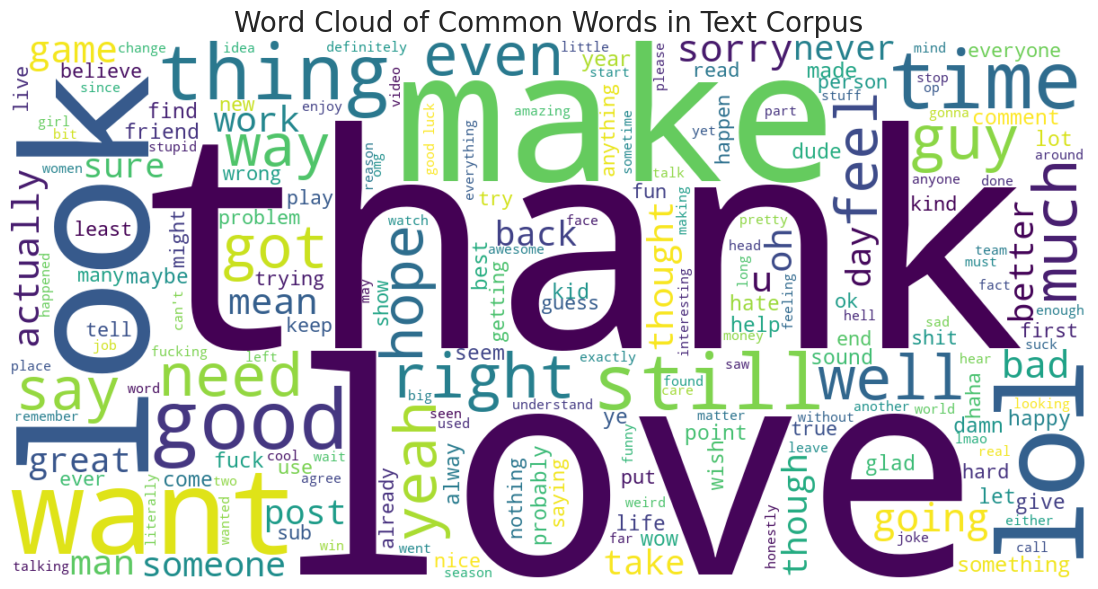

In [28]:
create_word_cloud(raw, text_column='text')

# Data Preprocessing

In [29]:
# Creating the final dataframe with texts that have 4 or fewer emotions
raw_filtered = raw[raw['count_emotions'] <= 4]

df = raw_filtered[['text', 'final_emotion']].copy()

In [30]:
# Defining a slang dictionary for translation
slang_dict = {
    "lit": "awesome", "flex": "boast", "bae": "partner", "fam": "friends", 
    "savage": "fierce", "thicc": "curvy", "snack": "attractive", "slay": "excel", 
    "shade": "insult", "clutch": "essential", "thirsty": "desperate", 
    "basic": "unoriginal", "dope": "excellent", "goat": "best", "ghost": "disappear", 
    "ratchet": "trashy", "woke": "aware", "vibing": "relaxed", "mood": "feeling", 
    "bet": "agreement", "ship": "support", "litty": "exciting", "af": "extremely", 
    "ghosting": "disappearing", "salty": "bitter", "fomo": "anxiety", 
    "throwing shade": "criticizing", "chill": "relax", "wig": "shocking", 
    "clap back": "respond", "no cap": "honest", "dank": "excellent", 
    "lituation": "exciting situation", "stan": "support intensely", 
    "drippin'": "stylish",
    "throwing shade": "criticizing", 
    "clap back": "respond", 
    "no cap": "honest" 
}

In [31]:
# Function to replace slang words in text with their formal equivalents
def convert_slang_words(text, slang_dict=slang_dict):
    # Convert multi-word slang first to avoid partial replacements
    for slang, formal in sorted(slang_dict.items(), key=lambda item: len(item[0].split()), reverse=True):
        # Use regex to replace whole words only (word boundaries \b)
        text = re.sub(r'\b' + re.escape(slang) + r'\b', formal, text)
    return text


stopWord = nltk.corpus.stopwords.words("english") + ["u", "im", "c", "quot"]
lemmatizer = WordNetLemmatizer()
# Keep "not" for sentiment/emotion analysis
if "not" in stopWord:
    stopWord.remove("not") 

#  Function that applies comprehensive text cleaning, slang conversion, lemmatization, and stop-word removal.
def clean_data(text_input):
    
    # 1. Lowercase
    text_input = text_input.lower()
    
    # 2. Convert slang words 
    text_input = convert_slang_words(text_input) 
    
    # 3. Remove various entities
    text_input = re.sub(r"@\w+\s*", "", text_input)         # Remove mentions
    text_input = re.sub('\[.*?\]', '', text_input)          # Remove text in brackets
    text_input = re.sub('https?://\S+|www\.\S+', '', text_input) # Remove links
    text_input = re.sub('<.*?>+', '', text_input)           # Remove HTML tags
    text_input = re.sub(r"\s*\.\.\.\s*", " ", text_input)   # Replace ellipsis with space
    
    # 4. Remove punctuation
    text_input = text_input.translate(str.maketrans('', '', string.punctuation))
    
    # 5. Remove newlines and numeric words
    text_input = re.sub('\n', ' ', text_input)
    text_input = re.sub('\w*\d\w*', '', text_input)
    
    # 6. Tokenize
    tokens = nltk.word_tokenize(text_input) 
    
    # 7. Lemmatize and remove stop words
    cleaned_tokens = [
        lemmatizer.lemmatize(word) for word in tokens 
        if word not in stopWord and len(word) > 1 # Also remove single-character tokens
    ]
    
    # Return as a list of cleaned tokens (best for feature extraction/modeling)
    return cleaned_tokens



In [32]:
# Applying the cleaning function to the 'text' column and creating a new 'cleaned_text' column
df["cleaned_text"] = df["text"].apply(clean_data) 

# Modelling

## Model Building

In [36]:
class FallbackSplitter:
        def __init__(self, n_splits=1, test_size=0.2, random_state=None):
            self.test_size = test_size
            self.random_state = random_state
        def split(self, X, Y):
            X_train, X_test, Y_train, Y_test = MultilabelStratifiedShuffleSplit_fallback(
                X, Y, test_size=self.test_size, random_state=self.random_state
            )
            # Yielding the indices as required by the iterative library interface
            # Note: This fallback does NOT fix the stratification error.
            yield X_train.index.values, X_test.index.values
MultilabelStratifiedShuffleSplit = FallbackSplitter

In [37]:
df = df.reset_index(drop=True)


In [38]:
def split_emotions(emotion_string):
    if emotion_string.strip() in ['neutral', 'no_emotion']:
        return [emotion_string.strip()]
    return [e.strip() for e in emotion_string.split(',') if e.strip()]

df['emotion_list'] = df['final_emotion'].apply(split_emotions)

mlb = MultiLabelBinarizer()
Y = mlb.fit_transform(df['emotion_list'])
Y_df = pd.DataFrame(Y, columns=mlb.classes_)

In [39]:
X = df['text']

In [40]:
msss = MultilabelStratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

# Use the split method to get the indices
for train_index, test_index in msss.split(X, Y):
    # X_train and Y_train are now created using these indices
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    Y_train, Y_test = Y[train_index], Y[test_index]

print("\n--- Train/Test Split Successful Using Multi-Label Stratification ---")
print(f"Total rows: {len(df)}")
print(f"X_train size: {len(X_train)} (Target Y_train shape: {Y_train.shape})")
print(f"X_test size: {len(X_test)} (Target Y_test shape: {Y_test.shape})")


--- Train/Test Split Successful Using Multi-Label Stratification ---
Total rows: 211035
X_train size: 168828 (Target Y_train shape: (168828, 29))
X_test size: 42207 (Target Y_test shape: (42207, 29))


In [41]:
# Defiing various model pipelines 
log_pipe = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", MultiOutputClassifier(LogisticRegression(random_state=42, solver='liblinear')))]

     )
"""
rf_pipe = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", MultiOutputClassifier(RandomForestClassifier(n_estimators = 200, max_depth = None, n_jobs = -1)))]
     )
"""

multinomial_pipe = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", MultiOutputClassifier(MultinomialNB()))]
     )

svc_pipe = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", MultiOutputClassifier(LinearSVC(random_state=42, dual=True, max_iter=10000)))]
     )

multi_pipelines = {
    "Logistic Regression": log_pipe,
   # "Random Forest": rf_pipe,
    "Multinomial Naive Bayes": multinomial_pipe,
    "LinearSVC": svc_pipe
}

In [42]:
# Training and evaluating each model
multi_results = {}

# looping through each model pipeline
for name, pipe in multi_pipelines.items():
    print(f"\nTraining {name}...")

    # fit the pipeline
    pipe.fit(X_train, Y_train)

    # make predictions
    y_pred = pipe.predict(X_test)

    # compute the evaluation metrics
    accuracy = accuracy_score(Y_test, y_pred)
    precision = precision_score(Y_test, y_pred, average='weighted', zero_division=0)
    recall = recall_score(Y_test, y_pred, average='weighted', zero_division=0)
    f1 = f1_score(Y_test, y_pred, average='weighted', zero_division=0)

    # store the results
    multi_results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1
    }

    # display the results
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(" Classification Report:")
    print(classification_report(Y_test, y_pred, target_names=mlb.classes_))
# create a DataFrame to display the results
multi_results_df = pd.DataFrame(multi_results).T
multi_results_df = multi_results_df.round(4)
print(multi_results_df)

# determine the best model based on f1 score
best_multi_model = multi_results_df['f1_score'].idxmax()
print(f"\nBest performing model: {best_multi_model}")
print(f"Best f1 score: {multi_results_df.loc[best_multi_model, 'f1_score']:.4f}")


Training Logistic Regression...
Accuracy: 0.1273
Precision: 0.5757
Recall: 0.1425
F1 Score: 0.2074
 Classification Report:
                precision    recall  f1-score   support

    admiration       0.67      0.26      0.37      3397
     amusement       0.65      0.28      0.40      1909
         anger       0.55      0.09      0.15      1620
     annoyance       0.46      0.02      0.03      2716
      approval       0.55      0.03      0.06      3413
        caring       0.58      0.04      0.08      1229
     confusion       0.52      0.04      0.07      1455
     curiosity       0.54      0.05      0.09      1893
        desire       0.62      0.08      0.14       734
disappointment       0.58      0.01      0.02      1653
   disapproval       0.38      0.02      0.04      2330
       disgust       0.65      0.09      0.16      1066
 embarrassment       0.67      0.03      0.06       464
    excitement       0.51      0.06      0.10      1129
          fear       0.64      0.15

 **Insight:** 
 
- *Linear SVC* is the better performing model with f1 score of $\mathbf{0.26}$

- *Logistic Regression* a close second, demonstrating excellent linear separability with an f1 score of $\mathbf{0.21}$

- *Multinomial Naive Bayes* being the worst performing model with n f1 score of $\mathbf{0.05}$

- The *Linear SVC* and *Logistic Regression* models are performing significantly better than the and the probabilistic model *MNB.*

**Conclusion**

- *Focus Tuning*: All future efforts (like oversampling for rare classes) will be focused on improving the Linear SVC model and Logistic Regression model, as they have the highest performance.

## Model Improvement

### Class weights

In [44]:
from sklearn.utils.class_weight import compute_class_weight

In [45]:
CLASS_WEIGHTS = {}
for i in range(Y_train.shape[1]):
    # Compute weights for the binary column (label i)
    weights = compute_class_weight(
        class_weight='balanced', 
        classes=np.unique(Y_train[:, i]), 
        y=Y_train[:, i]
    )
    # Store weights as a dictionary {0: weight_for_0, 1: weight_for_1}
    CLASS_WEIGHTS[i] = {cls: weight for cls, weight in zip(np.unique(Y_train[:, i]), weights)}

# Function to apply the pre-calculated weights to the base estimators within MultiOutputClassifier
def get_weighted_estimators(base_estimator_class, solver='liblinear'):
    estimators = []
    # Loop through each of the 29 labels
    for i in range(Y_train.shape[1]):
        # Get the weight dictionary for this specific label
        weights = CLASS_WEIGHTS[i]
        
        # Instantiate the base model with the computed class weights
        if base_estimator_class is LogisticRegression:
            estimator = LogisticRegression(
                random_state=42, 
                solver=solver, 
                class_weight=weights, # Apply the weights
                max_iter=10000 
            )
        elif base_estimator_class is LinearSVC:
            estimator = LinearSVC(
                random_state=42, 
                dual=True, 
                max_iter=10000, 
                class_weight=weights # Apply the weights
            )
        else:
            raise ValueError("Unsupported estimator")
            
        estimators.append(estimator)
    return estimators


In [46]:
# Create the MultiOutputClassifier instances using the weighted estimators
log_model_weighted = MultiOutputClassifier(LogisticRegression(random_state=42)) 
log_model_weighted.estimators_ = get_weighted_estimators(LogisticRegression)

svc_model_weighted = MultiOutputClassifier(LinearSVC(random_state=42))
svc_model_weighted.estimators_ = get_weighted_estimators(LinearSVC)


# Resampled Logistic Regression Pipeline using Class Weights
log_pipe_weighted = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", log_model_weighted)]
     )

# Resampled Linear SVC Pipeline using Class Weights
svc_pipe_weighted = Pipeline(
    [("tfidf", TfidfVectorizer()),
     ("model", svc_model_weighted)]
     )


weighted_pipelines = {
    "LogReg Weighted": log_pipe_weighted, 
    "SVC Weighted": svc_pipe_weighted     
}

In [47]:
final_results = {}
report_strings = {}

# Set up the TF-IDF vectorizer manually for training the weighted models later
tfidf_vectorizer = TfidfVectorizer()
X_train_transformed = tfidf_vectorizer.fit_transform(X_train)
X_test_transformed = tfidf_vectorizer.transform(X_test)


for name, pipe in weighted_pipelines.items():
    print(f"\n--- Training {name} ---")

    # Fit weighted models using pre-transformed data since weights are already set
    pipe['model'].fit(X_train_transformed, Y_train)
    y_pred = pipe['model'].predict(X_test_transformed)
    # Note: We skip fitting the TfidfVectorizer step for weighted models here since we did it manually

    # Compute and store metrics
    f1 = f1_score(Y_test, y_pred, average='weighted', zero_division=0)
    
    final_results[name] = {
        'F1 Score (Weighted)': f1,
        'Precision (Weighted)': precision_score(Y_test, y_pred, average='weighted', zero_division=0),
        'Recall (Weighted)': recall_score(Y_test, y_pred, average='weighted', zero_division=0)
    }
    
    # Store the full classification report for detailed comparison
    report_strings[name] = classification_report(Y_test, y_pred, target_names=mlb.classes_, zero_division=0)

    print(f"F1 Score (Weighted): {f1:.4f}")


--- Training LogReg Weighted ---
F1 Score (Weighted): 0.2100

--- Training SVC Weighted ---
F1 Score (Weighted): 0.2612


## Deep Learning : DistilBert